In [1]:
import json
def load_json(file_path):
    """
    Load a JSON file and return its content as a Python dictionary.

    Parameters:
        file_path (str): The path to the JSON file.

    Returns:
        dict: The content of the JSON file as a dictionary.
    """
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return data
def save_json(data, file_path):
    """
    Save a Python dictionary to a JSON file.

    Parameters:
        data (dict): The data to save.
        file_path (str): The path where the JSON file will be saved.
    """
    with open(file_path, 'w', encoding='utf-8') as file:
        json.dump(data, file, ensure_ascii=False, indent=4)

In [2]:
path_list = [
"/data_ssd/PASCAL-VOC/check_length/paligemma/check-length_test_pascal-voc_one-class_for_paligemma_sort_size.json",
"/data_ssd/PASCAL-VOC/check_length/paligemma/check-length_train_pascal-voc_one-class_for_paligemma_sort_size.json",
"/data_ssd/PASCAL-VOC/check_length/paligemma/check-length_val_pascal-voc_one-class_for_paligemma_sort_size.json",
]

In [3]:
data = []
for path in path_list:
    data.extend(load_json(path))

In [4]:
print(data[0])

{'total_ids_length': 265, 'input_ids_length': 260, 'output_ids_length': 5, 'source': {'id': '000001_dog', 'image': 'PASCAL-VOC/ultralytics/images/test2007/000001.jpg', 'conversations': [{'from': 'human', 'value': '<image>detect dog'}, {'from': 'gpt', 'value': '<loc0489><loc0136><loc0757><loc0562>'}], 'gt_entities_quantized_normalized': [['dog', [[0.13294232649071358, 0.4780058651026393, 0.5493646138807429, 0.739980449657869]]]], 'gt_entities_normalized': [['dog', [[0.1331444759206799, 0.478, 0.5495750708215298, 0.74]]]], 'image_width_height': [353, 500], 'ann_id': '000001'}}


In [5]:
length_list = []
for index, item in enumerate(data):
    # print(index)
    length = item["total_ids_length"]
    length_list.append(length)
print(f"max length: {max(length_list)}")

max length: 494


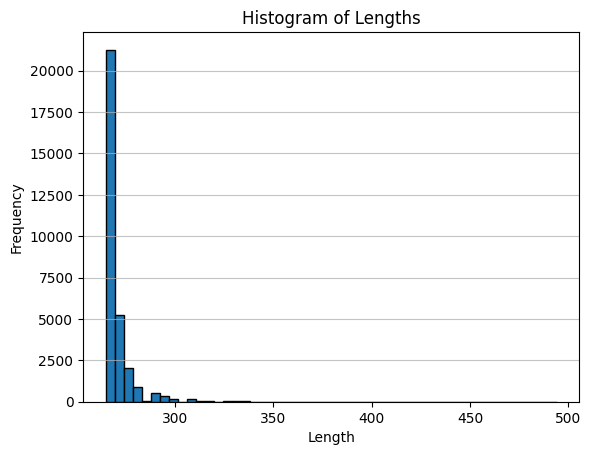

In [6]:
import matplotlib.pyplot as plt
plt.hist(length_list, bins=50, edgecolor='black')
plt.title('Histogram of Lengths')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [7]:
max_output_len = 128 + 256
under_max_list = [l for l in length_list if l <= max_output_len]
print(f"max length under {max_output_len}: {max(under_max_list)}")

max length under 384: 379


In [9]:
print(len(data))
print(len(under_max_list))

31001
30992


# 切り詰めjson作成

In [10]:
max_output_len = 384
path_dict = {
"train": "/data_ssd/PASCAL-VOC/check_length/paligemma/check-length_train_pascal-voc_one-class_for_paligemma_sort_size.json",
"val": "/data_ssd/PASCAL-VOC/check_length/paligemma/check-length_val_pascal-voc_one-class_for_paligemma_sort_size.json",
}

save_path_dict = {
"train": "/data_ssd/PASCAL-VOC/paligemma/train_pascal-voc_one-class_for_paligemma_sort_size_under384.json",
"val": "/data_ssd/PASCAL-VOC/paligemma/val_pascal-voc_one-class_for_paligemma_sort_size_under384.json",
}

for key in path_dict.keys():
    data = load_json(path_dict[key])
    new_data = [item["source"] for item in data if item["total_ids_length"] <= max_output_len]
    print(f"{key}: {len(data)} -> {len(new_data)}")
    save_json(new_data, save_path_dict[key])

train: 20370 -> 20366
val: 3618 -> 3614


In [12]:
max_output_len = 384
path_dict = {
"train": "/data_ssd/PASCAL-VOC/check_length/paligemma/check-length_train_pascal-voc_one-class_for_paligemma_sort_udlr.json",
"val": "/data_ssd/PASCAL-VOC/check_length/paligemma/check-length_val_pascal-voc_one-class_for_paligemma_sort_udlr.json",
}

save_path_dict = {
"train": "/data_ssd/PASCAL-VOC/paligemma/train_pascal-voc_one-class_for_paligemma_sort_udlr_under384.json",
"val": "/data_ssd/PASCAL-VOC/paligemma/val_pascal-voc_one-class_for_paligemma_sort_udlr_under384.json",
}

for key in path_dict.keys():
    data = load_json(path_dict[key])
    new_data = [item["source"] for item in data if item["total_ids_length"] <= max_output_len]
    print(f"{key}: {len(data)} -> {len(new_data)}")
    save_json(new_data, save_path_dict[key])

train: 20370 -> 20366
val: 3618 -> 3614
